In [7]:
#Antes de nada, debemos de preparar el ambiente de computación con el que vamos a trabajar. 
#Para ello, vamos a utilizar el siguiente comando, que nos va a permitir obtener el ambiente adecuado de forma automática:

system2(command = './preparar_ambiente.sh', wait = TRUE)

#### INTRODUCCIÓN

En esta práctica vamos a llevar a cabo un análisis que va a consistir en explorar la distribución taxonómica de las secuencias
homólogas a una proteína de interés, la proteína CHRM1. Esta, junto con las proteínas CHRNA3 y CHRNA7, se trata de una proteína
que participa en la neurotransmisión de los humanos. La CHRM1, concretamente, es un receptor muscarínico de acetilcolina 
(CHolinergic Receptor Muscarinic 1 (NCBI)). Se conoce que el origen de estas familias de proteínas se encuentra en el linaje del último antepasado común entre cnidarios y cordados, por lo que surgieron durante la época inicial de la evolución de los animales. Esto implica, por tanto, que no se han encontrado proteínas homólogas en linajes anteriores como ctneóforos, poríferos, placozoa, hongos o plantas.

#### MÉTODOS

Este análisis de búsqueda de secuencias homólogas lo vamos a realizar a partir de la base de datos de Swissprot, ya que es una
base de datos de secuencias de proteínas que está incluida en el ambiente de trabajo que estamos usando. Para la búsqueda
utilizaremos el programa blastp, el cual nos permite ir introduciendo diferentes valores E. Esto nos va a servir para ver el
ritmo al que aumenta la distribución taxonómica de las secuencias encontradas a medida que vamos disminuyendo el grado de 
similitud que exigimos que haya entre las secuencias homólogas y nuestra secuencia de interés.

#### RESULTADOS

- En primer lugar, vamos a llevar a cabo una primera búsqueda individual con blastp en la que vamos a establecer un valor E muy exigente, de 1e-50. De esta forma nos aseguramos de que solo nos aparezcan aquellas secuencias que sean extremadamente similares a la secuencia de nuestra proteína de interés CHRM1.

In [8]:
#El comando para hacer esta primera búsqueda es el siguiente:

BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

In [9]:
#Como resultado de este comando, obtenemos un archivo "BlastOut01" que contiene mucho texto plano.
#Para poder observar de una forma más visual su contenido vamos a utilizar las funciones textConnection() y read.table(), 
#que permiten transformarlo en un "data frame", es decir, en una tabla donde cada columna es una variable y la información
#está más organizada.

TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

#Para conocer las dimensiones de la tabla generada (nº de filas y columnas) utilizamos el siguiente comando:

dim(TablaOut01)

[1] 37 11

In [10]:
#Pedimos que nos muestre la tabla:

TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


In [11]:
#Como podemos observar, en la tabla hay 37 filas, es decir, se han encontrado 37 secuencias. De estas, 36 corresponden con las
#secuencias de proteínas con suficiente similitud a nuestra proteína de interés que ha encontrado el programa y, además, también
#está incluida la secuencia de la proteína de interés CHRM1, por eso hay 37.

- Ahora, vamos a llevar a cabo una búsqueda en serie con el blastp. Esto nos va a permtir ir utilizando diferentes valores E para poder observar cómo va aumentando el número de secuencias homólogas que encuentra el programa a medida que utilizamos un valor E menos exigente, es decir, un valor E mayor.

Esto podemos hacerlo ejecutando el comando anterior varias veces y cambiando cada vez el valor que le damos al parámetro 
'-evalue' para ver cómo va variando el resultado o podemos hacerlo de forma automática. Para hacerlo de esta segunda forma
podemos usar la función 'lapply()'.

In [12]:
#Primero, vamos a generar un vector donde introduzcamos los diferentes valores E con los que queremos hacer el análisis anterior
#en serie:

Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

In [13]:
#Ahora, vamos a usar la función 'lapply()' para ejecutar la búsqueda en blastp para cada valor del vector `Valores_E_maximos`.
#Como resultado vamos a obtener una tabla como la anterior para cada valor E, por lo que tendremos una lista de tablas:

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

In [14]:
#Si queremos visualizar una de las 10 tablas generadas con el comando anterior, podemos pomos indicar entre corchetes el número
#de la tabla individual que queremos ver: 

tail(Lista_de_Tablas[[3]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
89,Q09388.3,36.323,223,34,241,14,236,2.66e-37,6239,Caenorhabditis elegans,nematodes
90,Q60476.1,26.699,412,34,433,56,445,1.07e-34,10141,Cavia porcellus,rodents
91,Q588Y6.1,33.761,234,3,235,26,247,1.10e-32,9685,Felis catus,carnivores
92,Q25322.1,30.085,236,23,258,49,271,1.07e-31,7004,Locusta migratoria,grasshoppers
93,Q25321.1,30.085,236,23,258,49,271,1.12e-31,7004,Locusta migratoria,grasshoppers
94,P35404.1,33.645,214,22,235,46,246,6.95e-31,9267,Didelphis virginiana,marsupials


In [15]:
#Como vemos, nos muestra la tabla con las secuencias homólogas encontradas a partir de la búsqueda en blastp con el tercer 
#valor E que habíamos dado, el de 1.0e-30.

#Podemos probar a buscar otras tablas con otros valores E:

tail(Lista_de_Tablas[[6]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
572,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses
573,Q9P1P4.1,23.834,193,42,225,48,234,1.47e-09,9606,Homo sapiens,primates
574,Q9Y5X5.2,27.338,139,22,160,144,280,1.58e-09,9606,Homo sapiens,primates
575,Q6W3F4.1,30.709,127,39,165,21,145,1.87e-09,9615,Canis lupus familiaris,carnivores
576,Q64077.1,28.221,163,2,163,9,169,1.88e-09,10141,Cavia porcellus,rodents
577,P32302.1,27.835,194,17,204,43,234,1.99e-09,9606,Homo sapiens,primates


In [16]:
tail(Lista_de_Tablas[[10]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
769,O62795.1,28.477,151,22,170,34,181,1.32e-09,39089,Phoca groenlandica,carnivores
770,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses
771,Q9P1P4.1,23.834,193,42,225,48,234,1.47e-09,9606,Homo sapiens,primates
772,Q9P1P4.1,32.143,84,350,433,241,324,4.38e-06,9606,Homo sapiens,primates
773,Q9Y5X5.2,27.338,139,22,160,144,280,1.58e-09,9606,Homo sapiens,primates
774,Q9Y5X5.2,30.380,79,359,430,370,447,2.83e-04,9606,Homo sapiens,primates


In [17]:
#Como usamos el comando tail, solamente nos muestra una tabla con las últimas secuencias encontradas por el programa blastp
#para los diferentes valores E que nosotros especificamos. Con esto podemos observar y verificar que cuanto mayor es el valor E
#utilizado, mayor número de secuencias homólogas se encuentran, porque el programa es menos restrictivo a la hora de buscar 
#secuencias homólogas a nuestra proteína original CHRM1.

In [18]:
#Si queremos saber el número de secuencias homólogas que ha encontrado el blastp en la base de datos de Swissprot con cada uno
#de los valores E que le hemos indicado al elaborar la Lista de tablas, podemos utilizar la función 'dim()' para que nos dé las
#dimensiones de las diferentes tablas que ha elaborado, de manera que, sabiendo el número de filas y columnas podremos conocer 
#el número de secuencias, ya que cada fila corresponde con una secuencia.
#Por tanto, al utilizar la función 'dim()', especificamos que nos dé solo el primer valor, correspondiente con el número de
#filas, indicando un 1 entre corchetes:

Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])

#Pedimos que nos dé el resultado del número de secuencias homólogas encontradas para cada valor E:

Numero_de_resultados

[1]  37  53  94 249 485 577 647 682 730 774

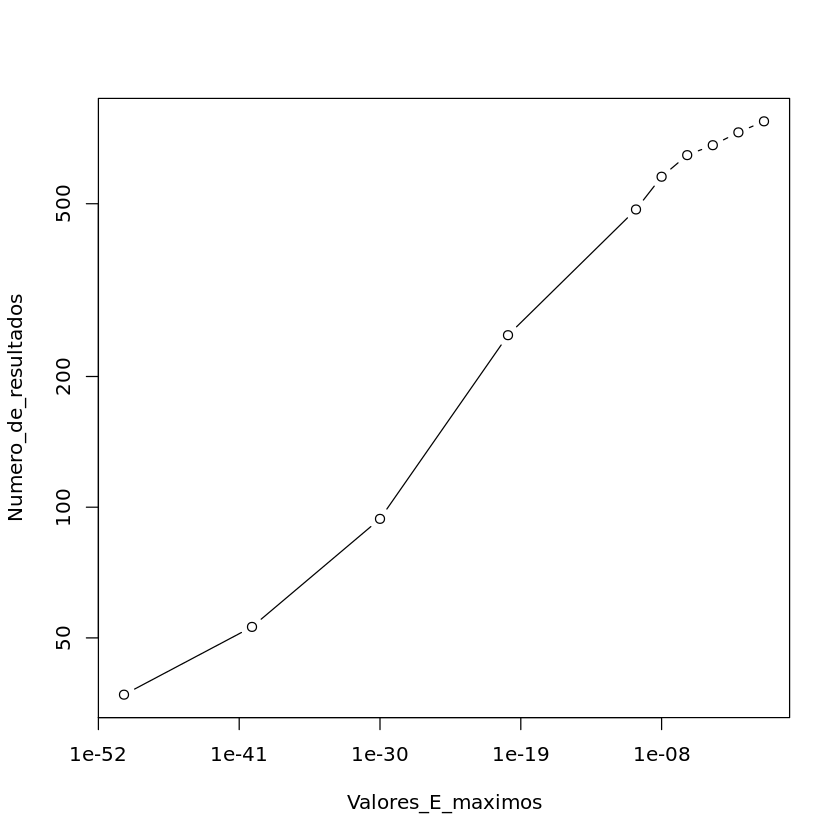

In [19]:
#Podemos representar el número de resultados obtenidos para cada valor E en una gráfica. Esta gráfica puede estar en escala 
#logarítmica solamente en un eje ("log='x'"), en los dos, o en ninguno. 
#En este caso, la hacemos en escala logarítmica para los dos ejes:

plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

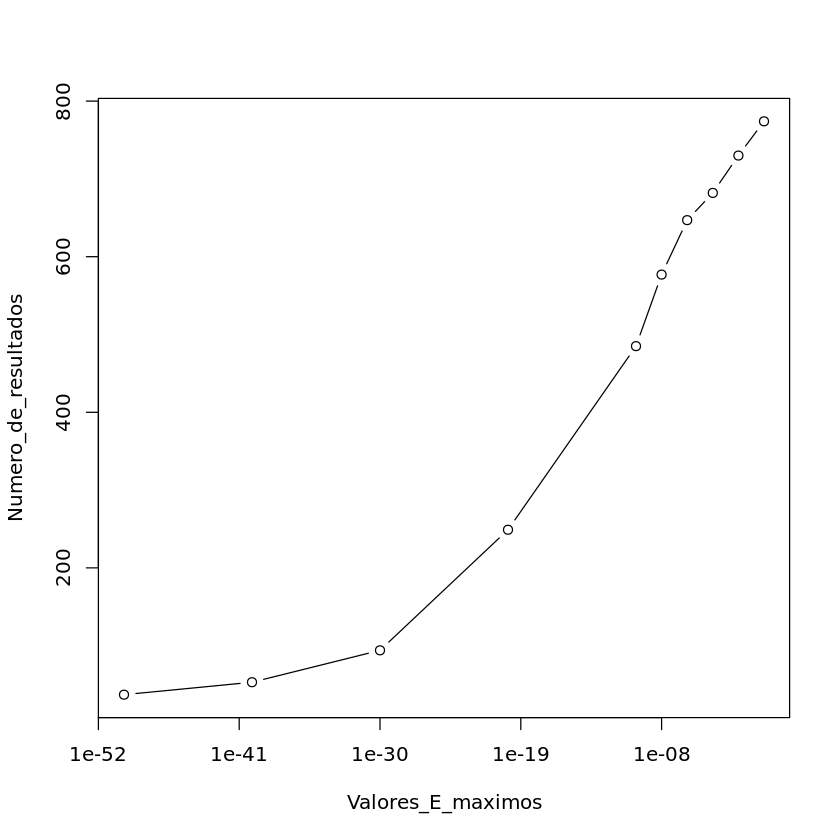

In [20]:
#Probamos, también, a ver la gráfica resultante si solamente ponemos en escala logarítmica los valores E:

plot(Valores_E_maximos, Numero_de_resultados, log = 'x', type = 'b')

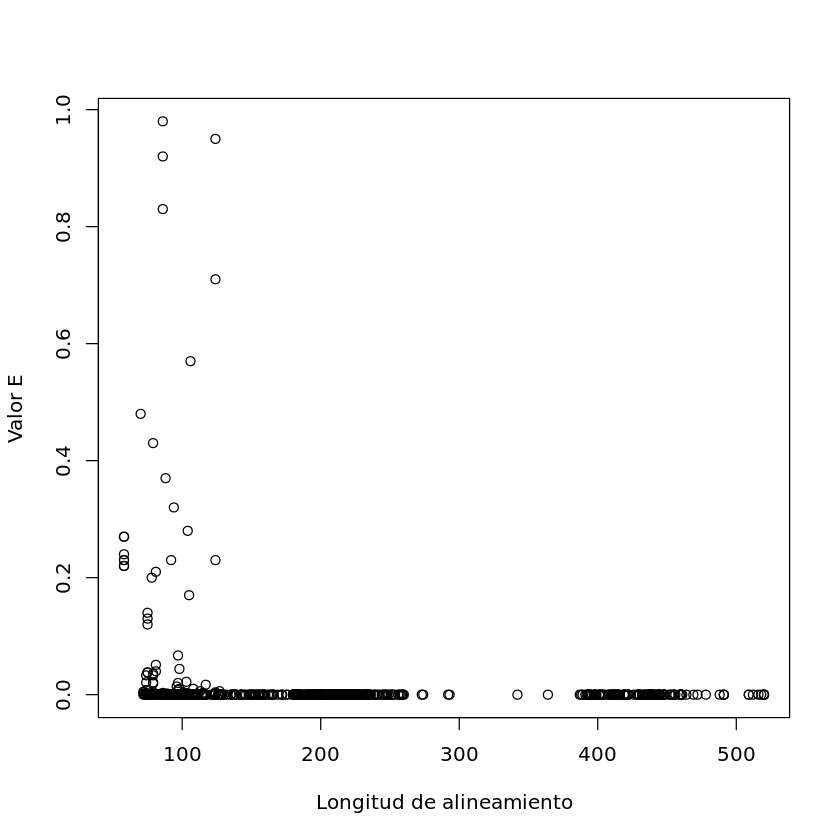

In [22]:
#Ahora vamos a ver a partir de la última tabla elaborada con el blastp con el último valor E, cuál es la relación entre la 
#longitud del alineamiento y el valor E, ya que en esta tabla número 10 se ha usado un valor E de 1 y, por tanto, es el menos 
#restrictivo, por lo que tiene un mayor número de resultados.

#Para llevar a cabo esta acción, ejecutamos el siguiente comando, donde el símbolo $ nos va a permitir averigurar en la tabla 
#que especificamos, la información que se encuentra dentro de la columna que se indica después de este símbolo:

plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

In [23]:
#La proteína CHRM1 sabemos que presenta 460 aa, sin embargo, vemos que hay varios alineamientos que se sitúan por debajo de 
#este valor, llegando incluso a los 100 aa o menos, lo que nos indica que hay homologías parciales entre las secuencias que nos
#está encontrando el blastp con nuestra secuencia de interés.

#Vamos a pedir que nos enseñe las diferentes longitudes que presentan las secuencias que se encuentran cuando se utiliza el 
#valor E menos restrictivo, poniendo el siguiente comando:

Lista_de_Tablas[[10]]$length

[1] 460 460 460 460 460 460 520 520 518 520 509 520 509 491 512 491 491 516
 [19] 448 444 439 444 444 439 439 452 439 432 459 472 215 109 211 109 245  85
 [37] 208 164 456 488 464 408 461 455 453 430 469 460 439 436 448 455 444 448
 [55] 445 448 448 445 414 415 410 414 414 436 394 394 412 414 430 404 437 394
 [73] 394 439 437 415 401 448 433 412 394 428 419 430 430 437 430 443 434 419
 [91] 408 445 447 442 429 429 441 455 478 440 440 442 183 183 412 393 393 183
[109] 426 422 422 439 439 223 187 387 433 402 412 422 422 410 421 410 439 438
[127] 234 107 420 236 236 214 110 205  93 405 256 127 419 224  96 411 198 107
[145] 193  97 242 127 228 183 419 221  96 364 238 124 185 108 194 107 391 401
[163] 227  93 230  96 213  79 403 259 127 197  95 342 223 259 127 413 251 127
[181] 274 126 225  90 247  96 244  96 207  90 231  96 235  98 234 130 228  87
[199] 411 396 215 127 259 200  91 206  87 248 127 259 129 395 229  90 192  93
[217] 194  93 234 127 220 118 208  91 398 203  82 233  96 399 392 226  82 234
[235] 127 200 105 225  88 223  99 223  99 227 121 189 162 186 123 200  92 192
[253]  78 230  91 232  86 200  92 197  99 184  75 216 102 388 190 127 221  77
[271] 192  99 249 107 221  77 233 109 203 111 211 194 123 216 115 227  86 257
[289]  91 403 148 227  86 232 111 220 111 220 115 220 111 219 111 190  92 226
[307]  94 228  91 229  99 180  84 215  91 241 111 214  77 219 111 201 113 252
[325] 106 212  86 253  90 247 110 200 105 251 126 180  93 205 111 180  93 205
[343] 111 246 111 180  93 200 105 224 142 190 101 226 105 251 126 256  95 180
[361]  93 231 128 200 115 225  75 191  90 398 188  75 235  96 398 216 115 195
[379]  91 234 104 224 151 132 293 193  96 233  91 165 193  96 193  96 193  96
[397] 193  97 221  96 221  96 221  96 184  80 210 117 233  91 111 104 182  96
[415] 182  96 189  72 197  76 226 103 227 103 398 216  75 184  75 203 124 194
[433] 117 228 127 197 149 401 226 103 214 184  75 200  94 208 151 207  75 214
[451]  75 258  75 234  97 239 129 452 239 102 213 186 165  96 226 220  75 215
[469] 408 220 108 217  75 185 212  75 159  72 153 218 153 150 208 207 124 435
[487] 218 155 104 189  79 208 203 206 124 159 127 220 108 214 440 220 193 143
[505] 215 106 420 183 169 104 218 103 193 114 218 155 104 436 220 186 213 104
[523] 419 190 212 181  73 194 208 212  74 222  88 138  99 222  94 146  89 212
[541]  81 211  81 225 109 217  88 218 108 416 217 110 231 224  86 226  75 223
[559]  95 220 108 220  90 221  58 224  86 214  94 137 217  74 206  92 223  86
[577] 152 104 142 226  75 180  81 219 122 138 228 156 224  88 137 209 156  72
[595] 225 109 183 220  90 226  58 226  58 220 158 197  88 228  58 203  58 217
[613]  74 235  74 226  58 137 155 124 155 124 224  88 222  94 137 220  93 212
[631]  74 166 137 221 107 197 104 196 105 197  88 202  58 104 208 196  96 220
[649]  90 217  88 224  93 143 176 437 160 166  78 135 103 135  94 191  74 212
[667] 159 226 196  81 192 124 181 175 150  75 202  88 208 123  96 213 185 224
[685] 158 221 181  83 201 273 104 210  70 172  81 172 193  97 202  79  98 202
[703]  79 172 198 108 143 292 389 205  75 202  79 202  79 212 436 208 200 260
[721] 196  79 184 194  87 205  75 212  97 197  98 158 196 100 127 117 163 233
[739] 115 193  86 127 191  97 185 209 139 116 200 145  78 195 101 126 115 127
[757] 103 210  86 126 115 149  78 211 101 210 210  86 151 198 193  84 139  79

In [24]:
#Se nos muestra el vector con los datos de longitudes de secuencias con los que se ha elaborado la tabla anterior.
#De esta forma podemos observar que hay muchos números menores de 460, que es el número de aminoácidos de la proteína CHRM1.
#Esto implica que hay una gran cantidad de proteínas que se parecen a nuestra proteína original solamente en un fragmento.

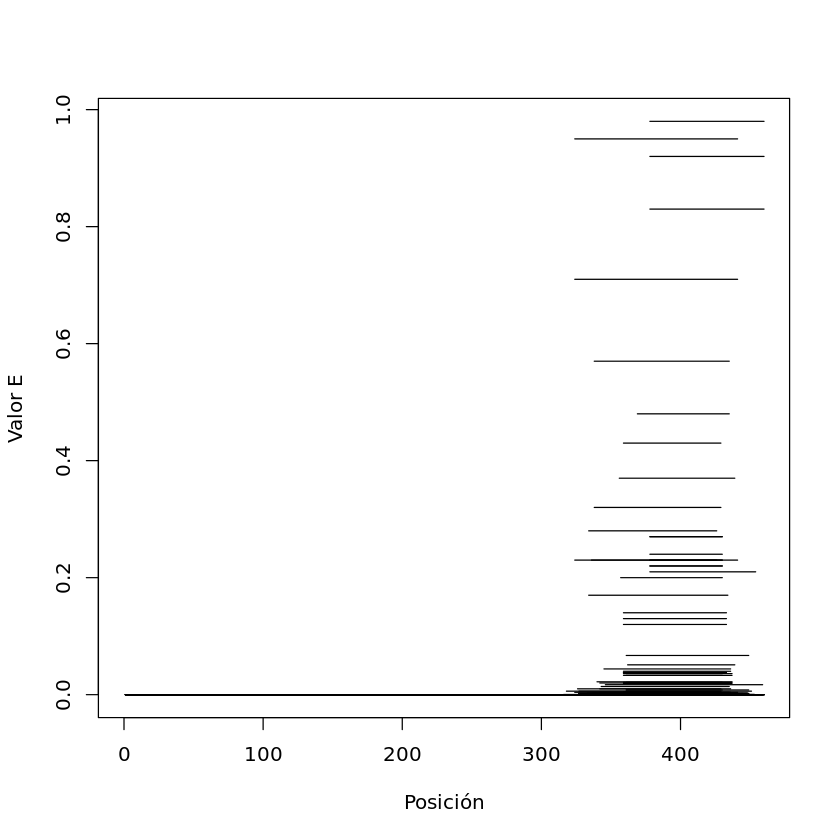

In [25]:
#Procedemos a averiguar qué posiciones de la secuencia de la proteína CHRM1 son las que alinean parcialmente con el resto de 
#secuencias encontradas con el valor E menos estricto.
#Para ello, primero damos nombre a los diferentes parámetros que queremos conocer de las secuencias:

inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

#Hacemos, en primer lugar, lo que llamamos el Alineamiento Máximo, porque vamos a elaborar una gráfica y tenemos que determinar 
#el rango del eje horizontal, estableciendo como valor máximo el "quend". 
#Luego elaboramos un gráfico con los rangos adecuados, pero vacío (type='n'). 
#Por último, utilizamos la función segments() para añadir segmentos al gráfico llevado a cabo previamente:

AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)

plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')

segments(inicios, valoresE, finales, valoresE)

In [26]:
#El gráfico resultante nos muesta que cuando se buscan secuencias homólogas con valores E menos estrictos la homología se 
#concentra sobre todo en posiciones alrededor de 400. Esto nos quiere decir que las secuencias encontradas se parecen sobre todo
#a la parte final de la secuencia de la CHRM1, lo que puede significar que esta parte final corresponde con un fragmento más 
#conservado de la proteína y que es compartido por proteínas de diferentes especies.

In [27]:
#En último lugar, vamos a explorar la distribución taxonómica de las secuencias encontradas con los diferentes valores E.
#Recordemos que, en las tablas que hemos elaborado, tenemos una columna 'sblastname' que nos da el nombre del grupo taxonómico 
#de rango superior al que pertenece cada secuencia con homología encontrada. De esta forma, tenemos las secuencias clasificadas
#para facilitar nuestra interpretación.

#Para llevar a cabo el análisis de la distribución taxonómica, una opción es contar en cada tabla las secuencias que se han
#encontrado de cada grupo taxonómico de la columna 'sblastname'. Esto lo podemos hacer aplicando la función `table()` sobre esa 
#columna de cada tabla en `Lista_de_Tablas`:

In [28]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [29]:
#Como resultado del último comando, obtenemos una lista donde aparece, para cada tabla generada a partir de cada valor E, 
#un recuento de los diferentes grupos taxonómicos que se encuentran con secuencias homólogas a nuestra proteína de interés.
#Hemos mencionado anteriormente que esta proteína surge entre la evolución de cnidarios y cordados, por lo que entre los grupos
#taxonómicos que aparecen no deberían de encontrarse ctneóforos, poríferos, placozoa, ni hongos ni plantas.

#Entre las secuencias encontradas para los diferentes valores E, ninguna pertenece a los grupos anteriormente mencionados,
#por lo que sí que podemos afirmar que las homologías pertenecen a proteínas que han tenido una evolución posterior y sí podrían
#tener una base taxonómica.

#Cabe destacar que en la lista de grupos taxonómicos obtenida a partir del último blastp (umbral de valor E de 1), uno de los
#grupos taxonómicos que aparece es el de virus, cosa que me ha resultado interesante.

In [31]:
#Para finalizar, vamos a ver la relación que hay entre la longitud de los alineamientos que se han encontrado y la distribución
#taxonómica que acabamos de observar. 
#Queremos saber cuáles son los grupos taxonómicos en los que hay secuencias que se parecen más a nuestra proteína de interés, 
#por lo que vamos a pedir que nos muestre aquellos grupos en los que realmente haya encontrado secuencias con un grado de 
#similitud elevado. Para ello, vamos a repetir el recuento de los grupos taxonómicos, pero teniendo en cuenta solo aquellas 
#secuencias que presenten un alineamiento de al menos 300 aminoácidos:

lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [32]:
#Podemos comprobar que el número de secuencias encontradas con una homología de 300 aminoácidos es menor.

#Vamos a comprobar, también, cuántas secuencias alinean exactamente con nuestra proteína de interés y a qué grupo taxonómico
#pertenece:

lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 460
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  1                   0                   3                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  10                   4 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  1                   0                   0                   3 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   0                   0 
           primates             rodents 
                 10                   4 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  1                   0                   0                   0 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [39]:
#El grupo taxonómico donde mayor cantidad de secuencias homólogas se encuentra es el de los primates, lo que tiene mucho
#sentido, ya que estamos buscando homologías para una proteína humana.

#Sin embargo, debemos de tener en cuenta que, realmente, que hayan alineado 460 aa no significa que hayan alineado exactamente
#con nuestra proteína de interés, ya que puede estar en porciones distintas. Para estar seguros al 100%, deberíamos ver con qué 
#parte de la secuencia de la proteína CHRM1 son homólogas.

#### DISCUSIÓN

Como conclusión podemos sacar que la proteína CHRM1 es una proteína humana con un origen muy temprano, presente en gran 
cantidad de grupos taxonómicos desde su aparición entre cnidarios y cordados. Esta presenta 460 aminoácidos, de los cuales la mayoría de especies presentan proteínas con homologías en las últimas posiciones, alrededor de la posición 400, lo que indica la presencia de un posible fragmento muy conservado a lo largo de la evolución.

Para comprobar esto, podríamos llevar a cabo una búsqueda de la secuencia en la base de datos Pfam (Mistry *et al*, 2021) para comprobar si esta parte de la proteína corresponde con algún dominio conservado típico de alguna familia de proteínas.

#### BIBLIOGRAFÍA

- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252 (https://doi:10.1093/molbev/msaa252).

- Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, Journal of Molecular Biology, Volume 215, Issue 3, 1990, Pages 403-410, doi:10.1016/S0022-2836(05)80360-2 (https://doi.org/10.1016/S0022-2836(05)80360-2).

- Eric W Sayers, Jeff Beck, J Rodney Brister, Evan E Bolton, Kathi Canese, Donald C Comeau, Kathryn Funk, Anne Ketter, Sunghwan Kim, Avi Kimchi, Paul A Kitts, Anatoliy Kuznetsov, Stacy Lathrop, Zhiyong Lu, Kelly McGarvey, Thomas L Madden, Terence D Murphy, Nuala O’Leary, Lon Phan, Valerie A Schneider, Françoise Thibaud-Nissen, Bart W Trawick, Kim D Pruitt, James Ostell, Database resources of the National Center for Biotechnology Information, Nucleic Acids Research, Volume 48, Issue D1, 08 January 2020, Pages D9–D16, https://doi.org/10.1093/nar/gkz899

- Jaina Mistry, Sara Chuguransky, Lowri Williams, Matloob Qureshi, Gustavo A Salazar, Erik L L Sonnhammer, Silvio C E Tosatto, Lisanna Paladin, Shriya Raj, Lorna J Richardson, Robert D Finn, Alex Bateman. Pfam: The protein families database in 2021, Nucleic Acids Research, Volume 49, Issue D1, 8 January 2021, Pages D412–D419, [doi:10.1093/nar/gkaa913](https://doi.org/10.1093/nar/gkaa913).